In [1]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d
import normalizaImg as normaliza
import cv2


In [2]:
# Leo las imagenes de entrenamiento
imNp = iio.imread('imgs/imagenOrigenPelota.png')
markImg = iio.imread('imgs/imagenMarcadaPelota.png')

**Píxeles de colores**:
1. `Rojo(255,0,0), Verde(0,255,0) y Azul(0,0,255)`.
2. **np.equal(markImg,(255,0,0))** -> obtiene los puntos marcados que contenga el pixel (255,0,0), eso se realizará igual con los otros dos colores ``GB``.
    * Devolverá una matriz de (True, False)

3. **np.all(np.equal(markImg,(255,0,0)),2)**; axis=2-> multidimensional(x,y,z).
    * Devolverá Una matriz donde los valores sean TRUE,es decir, que cooincidan con el valor del pixel obtenido anteriormente con **np.equal()**.
    * Devuelve matrix de (True, False)

4. **imNp[np.where(np.all(np.equal(markImg,(255,0,0)),2))]**:
    * Devolverá los elementos que cumplan la condición dentro de *np.where()*, es decir, devolverá solo el valor de los elementos que contenga el valor TRUE, de las anteriores soluciones.

In [3]:
# Almaceno los valores RGB de 'imNp' que fuero marcados en 'markImg' en rojo verde y azul
data_marca = imNp[np.where(np.all(np.equal(markImg,(255,0,0)),2))]# datos marcados en rojo
data_fondo = imNp[np.where(np.all(np.equal(markImg,(0,255,0)),2))]# datos marcados en verde
data_linea = imNp[np.where(np.all(np.equal(markImg,(0,0,255)),2))]# datos marcados en azul

Text(0.5, 0.92, 'Espacio RGB')

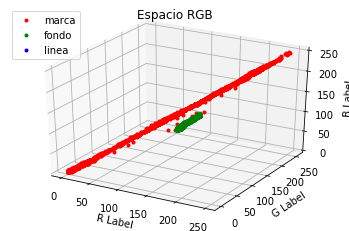

In [4]:
# Pinto los datos RGB
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(data_marca[:,0],data_marca[:,1],data_marca[:,2],'r.',label='marca')
ax.plot(data_fondo[:,0],data_fondo[:,1],data_fondo[:,2],'g.',label='fondo')
ax.plot(data_linea[:,0],data_linea[:,1],data_linea[:,2],'b.',label='linea')
ax.set_xlabel('R Label')
ax.set_ylabel('G Label')
ax.set_zlabel('B Label')
ax.legend()
plt.title('Espacio RGB')

In [5]:
# Ahora haglo lo mismo con los datos normalizados segun la 'normalizacion rgb'

#Básicamente normalizo(rgb)'/1(r+g+b) llamo a función que normaliza imagen
imrgbn = normaliza.normalizaIm(imNp,markImg)# Divido el valor RGB de cada pixel por la suma de los tres valores
imNp=imrgbn#Devuelvo el valor solo de RG [:2] 2 primeros elementos(z)
#print(imNp)

# (Hago lo mismo que antes pero con la normalizada)Almaceno los valores RG de 'imrgbn' que fueron marcados en 'markImg' en rojo verde y azul
data_marca_n = imNp[np.where(np.all(np.equal(markImg,(255,0,0)),2))]# datos marcados en rojo
data_fondo_n = imNp[np.where(np.all(np.equal(markImg,(0,255,0)),2))]# datos marcados en verde
data_linea_n = imNp[np.where(np.all(np.equal(markImg,(0,0,255)),2))]# datos marcados en azul

/home/robotica/Escritorio/codigo_python/codigo_python/codigo_alumnos2021/normalizaImg.py:11: RuntimeWarning: invalid value encountered in true_divide
  imrgbn = np.rollaxis((np.rollaxis(imNp,2)+0.0)/np.sum(imNp,2),0,3)[:,:,:2]# Divido el valor RGB de cada pixel por la suma de los tres valores


Text(0.5, 1.0, 'Espacio RGB normalizado')

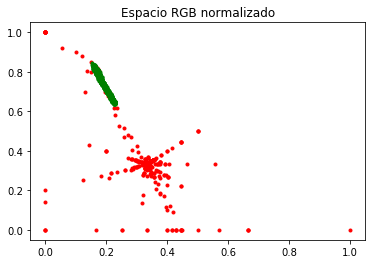

In [6]:
plt.figure()
plt.plot(data_marca_n[:,0],data_marca_n[:,1],'r.',label='marca')
plt.plot(data_fondo_n[:,0],data_fondo_n[:,1],'g.',label='fondo')
plt.plot(data_linea_n[:,0],data_linea_n[:,1],'b.',label='linea')
plt.title('Espacio RGB normalizado')

In [ ]:
#plt.show()